In [2]:
import scipy as sp
from scipy.sparse import spdiags
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

Use the finite element method to solve
 
εy" − y' = −1,

y(0) = α, y(1) = β,


where α = 2, β = 4, and ε = 0.02. Use N = 100 finite elements (101 grid points). Compare
your solution with the analytic solution

y(x) = α + x + (β − α − 1)* (e^(x/ε) − 1)/(e^(1/ε) − 1) by graphing.


In [3]:
def prob1(epsilon, alpha, beta, N, domain):
    
    # Initialize
    h = [domain[i]-domain[i-1] for i in range(1,N+1)] # This is the time step dt
    
    # Finite element method:
    
    # Define the matrix A
    A = np.zeros((N,N+1))
    # h_i = x_i - x_i-1
    diag = [(-1*epsilon/(domain[i]-domain[i-1])) - (epsilon/(domain[i]-domain[i-1])) for i in range(N+1)]
    diag = np.diag(diag)
    up_diag = [(epsilon/(domain[i]-domain[i-1])) - (1/2) for i in range(N)]
    up_diag = np.diag(up_diag, k=1)
    down_diag = [(epsilon/(domain[i+1]-domain[i])) + (1/2) for i in range(N)]
    down_diag = np.diag(down_diag, k=-1)
    A = diag + up_diag + down_diag
    A[0,:] = 0
    A[N,:] = 0
    A[0,0] = 1
    A[N,N] = 1
    
    # Define vector l
    l = [(-1/2)*(h[i+1]+h[i]) for i in range(N-1)]
    l.insert(0, alpha)
    l.append(beta)
    l = np.array(l)
    
    # Solve for k
    k = np.linalg.solve(A, l)
    
    return domain, k
    

In [4]:
# Initialize variables and analytic solution
epsilon = 0.02
alpha = 2
beta = 4
N = 100
domain = np.linspace(0,1,N+1)
analytic_sol = lambda x: alpha + x + (beta - alpha - 1)*((np.exp(x/epsilon)-1)/(np.exp(1/epsilon)-1))


# Solve the system using the given parameters
dom, sol = prob1(epsilon, alpha, beta, N, domain)

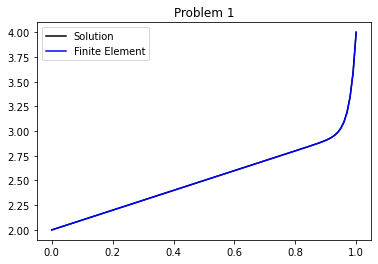

In [5]:
# Plot the solution
plt.plot(dom, analytic_sol(dom), color='black', label='Solution')
plt.plot(dom, sol, color='blue', label='Finite Element')
plt.legend()
plt.title('Problem 1')
plt.show()

# Problem 2

Compare the numerical solution when the grid points are unevenly spaced versus when the grid points
are clustered in the area of greatest change by plotting.

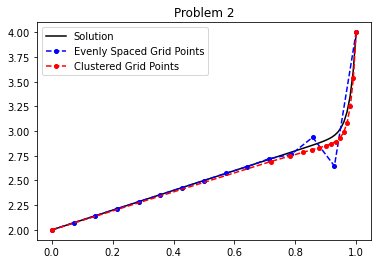

In [6]:
# Use domain with even and clustered grid
N = 14
even_grid = np.linspace(0,1,N+1)
clustered_grid = np.linspace(0,1,N+1)**(1./8)

# solve system with given params
dom1, sol1 = prob1(epsilon, alpha, beta, N, even_grid)
dom2, sol2 = prob1(epsilon, alpha, beta, N, clustered_grid)

# Plot the solution
plt.plot(dom, analytic_sol(dom), color='black', label='Solution')
plt.plot(dom1, sol1, '--o', markersize=4, color='blue', label='Evenly Spaced Grid Points')
plt.plot(dom2, sol2, '--o', markersize=4, color='red', label='Clustered Grid Points')
plt.legend()
plt.title('Problem 2')
plt.show()

# Problem 3

Solve (11.5) with the finite element method using N = 2^i finite elements, i = 4, 5, . . . , 21.

Use a log-log plot to graph the error.

In [ ]:
# Find the solution for N = 2^i
errors = []
for i in range(4,22):
    N = 2**i
    domain = np.linspace(0,1,N+1)
    dom, k = prob1(alpha, beta, epsilon, N, domain)
    analytic = analytic_sol(domain)
    errors.append(np.linalg.norm((analytic, k),ord=2))

errors

In [ ]:
# Plot the error for each N
plt.plot(np.arange(4,14), errors, color='black')
plt.xlabel('$n$')
plt.ylabel('$E(n)$')
plt.title('Problem 3')